In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from utils import abs_listdir

In [2]:
csv_results = abs_listdir('results/kernels')
csv_results

['/home/loveml/Desktop/dsproject/results/kernels/kernel_size_2_2.csv',
 '/home/loveml/Desktop/dsproject/results/kernels/kernel_size_5_5.csv',
 '/home/loveml/Desktop/dsproject/results/kernels/kernel_size_7_7.csv',
 '/home/loveml/Desktop/dsproject/results/kernels/kernel_size_1_1.csv',
 '/home/loveml/Desktop/dsproject/results/kernels/kernel_size_9_9.csv',
 '/home/loveml/Desktop/dsproject/results/kernels/kernel_size_3_3.csv',
 '/home/loveml/Desktop/dsproject/results/kernels/kernel_size_8_8.csv',
 '/home/loveml/Desktop/dsproject/results/kernels/kernel_size_4_4.csv',
 '/home/loveml/Desktop/dsproject/results/kernels/kernel_size_6_6.csv']

In [3]:
df = pd.read_csv(csv_results[1])
df

,node type,start,first,avg_ms,%,cdf%,mem KB,times called,name
0,CONV_2D,0.0000,13.706,13.29780,31.6625%,31.6625%,0,1,[sequential_4/conv2d_16/Conv2D]:0
1,PAD,13.2982,1.060,0.36872,0.877933%,32.5404%,0,1,[sequential_4/zero_padding2d_16/Pad]:1
2,MAX_POOL_2D,13.6677,2.283,1.98770,4.73277%,37.2732%,0,1,[sequential_4/max_pooling2d_16/MaxPool]:2
3,CONV_2D,15.6559,12.152,11.19070,26.6455%,63.9186%,0,1,[sequential_4/conv2d_17/Conv2D]:3
4,PAD,26.8470,0.394,0.18770,0.446919%,64.3656%,0,1,[sequential_4/zero_padding2d_17/Pad]:4
5,MAX_POOL_2D,27.0352,0.619,0.63490,1.51172%,65.8773%,0,1,[sequential_4/max_pooling2d_17/MaxPool]:5
6,CONV_2D,27.6702,8.461,8.09626,19.2774%,85.1547%,0,1,[sequential_4/conv2d_18/Conv2D]:6
7,PAD,35.7670,0.049,0.09480,0.225722%,85.3804%,0,1,[sequential_4/zero_padding2d_18/Pad]:7
8,MAX_POOL_2D,35.8621,0.146,0.18488,0.440205%,85.8206%,0,1,[sequential_4/max_pooling2d_18/MaxPool]:8
9,CONV_2D,36.0473,5.098,5.75800,13.71%,99.5306%,0,1,[sequential_4/conv2d_19/Conv2D]:9


In [4]:
dfs = {os.path.split(r)[1] : pd.read_csv(r) for r in csv_results}
conv_time_total = {}
padding_time_total = {}
kernel_size = {}

for filename, df in dfs.items():
    # convolution statistics
    df_convs = df[df['node type'].apply(lambda s: 'CONV' in s)]
    conv_time_total[filename] = df_convs[' avg_ms'].sum()

    # kernel size
    # exclude extension from filename
    fname = filename[:filename.index('.')]
    ks = fname.split('_')[2:4]
    ks = (int(ks[0]), int(ks[1]))
    kernel_size[filename] = ks

result = pd.DataFrame({'kernel_size': kernel_size,
                       'conv_time_total': conv_time_total})
result.sort_index(inplace=True)
result

,kernel_size,conv_time_total
kernel_size_1_1.csv,"(1, 1)",2.633581
kernel_size_2_2.csv,"(2, 2)",8.058530
kernel_size_3_3.csv,"(3, 3)",14.637980
kernel_size_4_4.csv,"(4, 4)",26.238360
kernel_size_5_5.csv,"(5, 5)",38.342760
kernel_size_6_6.csv,"(6, 6)",49.411440
kernel_size_7_7.csv,"(7, 7)",71.357800
kernel_size_8_8.csv,"(8, 8)",88.674100
kernel_size_9_9.csv,"(9, 9)",102.099400


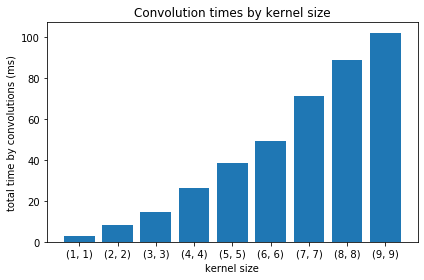

In [5]:
fig, ax = plt.subplots()

ax.set_ylabel('total time by convolutions (ms)')
ax.set_title('Convolution times by kernel size')
ax.set_xlabel('kernel size')


x = np.arange(len(result))
ax.bar(x, result['conv_time_total'])
xlabels = [str(s) for s in result['kernel_size']]
ax.set_xticks(x)
ax.set_xticklabels(xlabels)


fig.tight_layout()
plt.show()

In [6]:
result

,kernel_size,conv_time_total
kernel_size_1_1.csv,"(1, 1)",2.633581
kernel_size_2_2.csv,"(2, 2)",8.058530
kernel_size_3_3.csv,"(3, 3)",14.637980
kernel_size_4_4.csv,"(4, 4)",26.238360
kernel_size_5_5.csv,"(5, 5)",38.342760
kernel_size_6_6.csv,"(6, 6)",49.411440
kernel_size_7_7.csv,"(7, 7)",71.357800
kernel_size_8_8.csv,"(8, 8)",88.674100
kernel_size_9_9.csv,"(9, 9)",102.099400


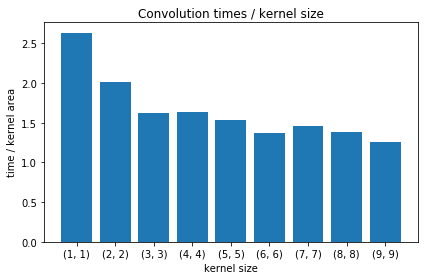

In [9]:
# result['ratio'] = result.apply(lambda r: print(r), axis=1)
result['ratio'] = result.apply(
    lambda r: r['conv_time_total'] / r['kernel_size'][0] / r['kernel_size'][1], 
    axis=1)

fig, ax = plt.subplots()

ax.set_ylabel('time / kernel area')
ax.set_title('Convolution times / kernel size')
ax.set_xlabel('kernel size')


x = np.arange(len(result))
ax.bar(x, result['ratio'])
xlabels = [str(s) for s in result['kernel_size']]
ax.set_xticks(x)
ax.set_xticklabels(xlabels)


fig.tight_layout()
plt.show()